In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 解題步驟：

1. 讀取 titanic.csv
2. 刪除無用特徵('PassengerId', 'Name', 'Cabin', 'Ticket')
3. 分析缺失值，練習繪製直方圖(如下圖二)
4. 分別以平均值及眾數填補
5. 將剩下是字串的欄位轉為數值(Age and Embarked)
6. 將資料切分為訓練及測試集
7. 輸入隨機森林訓練並測試模型在訓練及測試集上的準確度

#### 圖一
<img src="./titanic.png" style="zoom:30%;" />

#### 圖二
<img src="./hist.png" style="zoom:100%;" />

## 讀取資料

In [2]:
Total = pd.read_csv('./data/titanic.csv')
Total_fe = Total.copy()
Total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 刪除無用特徵('PassengerId', 'Name', 'Cabin', 'Ticket')

In [3]:
Total_fe = Total.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'])

## 填補缺失值
1. Discrete: 繪製圖表以判斷該如何填補
2. Continual: 使用平均值或中位數
3. 若缺失值過多則刪除

In [4]:
# Age
Total_fe.Age = Total.Age.fillna(Total.Age.mean())

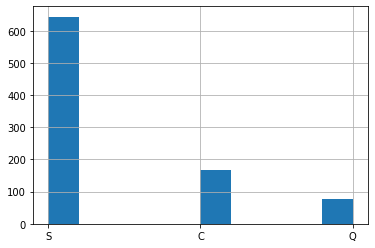

In [5]:
# Embarked
Total.Embarked.hist()
plt.show()

Total_fe.Embarked = Total.Embarked.fillna('S')

In [8]:
Total_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


## Feature transformation(Sex and Embarked)
- Label encoding
- One-hot encoding

In [7]:
# Label encoding
le = LabelEncoder()
Total_fe.Sex = le.fit_transform(Total.Sex)

# One-hot encoding
embarked = pd.get_dummies(Total_fe.Embarked, prefix = 'Embarked')
Total_fe = pd.concat([Total_fe, embarked], axis = 1)
Total_fe.drop(columns = ['Embarked'], inplace = True)

## 切分訓練集及測試集

In [12]:
Y = np.asarray(Total_fe.Survived)
X = np.asarray(Total_fe.drop(columns = ['Survived']))
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(668, 9) (223, 9) (668,) (223,)


## Training

In [13]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

## Evaluation

In [18]:
print('Training report')
pred = RF.predict(x_train)
print(classification_report(y_train, pred))

print()
print('Testing report')
pred = RF.predict(x_test)
print(classification_report(y_test, pred))

Training report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       408
           1       0.98      0.98      0.98       260

    accuracy                           0.99       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.99      0.99      0.99       668


Testing report
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       141
           1       0.77      0.74      0.76        82

    accuracy                           0.83       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.83      0.82       223

